# Simulazione di un ensemble microcanonico in Molecular Dynamics #
Il presente laboratorio ha come obiettivo la simuazione del comportamento di un ensemble microcanonico mediante un algoritmo di Molecular Dynamics. L'ensemble microcanonico è caratterizzato dalla conservazione di tre quantità, cioè il numero di particelle $N$, il volume $V$ e l'energia totale $E$. Nella nostra simulazione, supponiamo che le particelle interagiscano fra loro con un potenziale tipo Lennard-Jones, avente cioè la forma:
$$
 V(r)=4 \varepsilon \cdot \left[ \left( \frac{\sigma}{r} \right)^{12} - \left(\frac{\sigma}{r} \right)^6 \right]
$$
Questa supposizione è sensata per materiali che siano dotati di shell chiuse, mentre molto poco appropriata per simulare le complicate interazioni (fortemente influenzate dalla geometria) di materiali a shell aperte. Per questa ragione, la simulazione è particolarmente adatta per studiare il comportamento dei gas nobili.

Il fatto di usare un ensemble NVE ci obbliga a risolvere le equazioni di Newton per il moto delle particelle per via numerica con un algoritmo per cui sia garantita la conservazione dell'energia su lunga scala temporale. Per questa ragione non si usa un classico Eulero o un più raffinato Runge-Kutta ma un algoritmo a due passi noto come algoritmo di Verlet.

## Commenti sull'esecuzione delle misure ##
Per avviare la simulazione in tutti i casi sono partito da una configurazione fcc delle $N=108$ molecole considerate. In questa maniera si evita di avere sovrapposizioni di molecole nello stato iniziale (che sono invece piuttosto probabili se si parte da una disposizione casuale. A questo punto fornisco ad ogni molecola una velocità arbitraria, ma riscalata in maniera tale che la media quadratica delle velocità corrisponda al valore di temperatura richiesto dalla simulazione. Faccio partire la simulazione. Quello che si verifica è che la temperatura istantanea subisce una brusca variazione subito, per poi assestarsi su un valore che in genere è molto diverso da quello desiderato. A questo punto si termina la simulazione e si riparte dalla situazione finale, riscalando ulteriormente le velocità. Una volta che questa procedura è stata ripetuta qualche volta (di solito quattro o cinque ripetizioni con 5000 mosse a ripetizione sono sufficienti) si osserva che effettivamente il valore di temperatura si assesta sul valore desiderato.

Per le fasi solida a liquida l'equilibrazione ha presentato molti meno problemi che per la gassosa. In quest'ultima infatti è stato necessario eseguire più simulazioni con più mosse per ogni simulazione per ottenere un sistema equilibrato.

Una volta che il sistema risulta equilibrato, salvo le configurazioni finali e quelle dello step immediatamente precedente (ricordando che l'algoritmo di Verlet è un algoritmo a due passi e quindi che non si avvia semplicemente nota la posizione iniziale nello spazio delle fasi). A questo punto posso procedere ad eseguire le misure delle osservabili di interesse. Dette misure vengono eseguite con la tecnica della media a blocchi, suddividendo gli step in blocchi di uguale ampiezza. Per migliorare la precisione di misura, le simulazioni in cui eseguo misure delle osservabili a partire da una configurazione già equilibrata sono state più lunghe, dell'ordine dei $2 \cdot 10^4$ step per simulazione. I dati ottenuti vengono riportati nel seguito.

Il codice C++ che allego lavora in unità di Lennard-Jones, cioè in cui siano posti $\sigma = 1$, $\epsilon = 1$. Eseguo però a livello di analisi dati la conversione in unità del Sistema Internazionale.

# Argon #
Si considerano i valori delle costanti $\sigma = 0.34 nm$ ed $\epsilon = 120K \cdot k_B$ per l'argon, che vengono utilizzati per la riconversione dei risultati in unità del SI dalle unità di Lennard-Jones. Ho scelto di eseguire la conversione in fase di analisi dati in Python, invece che far funzionare il programma in unità del SI per due motivi:
<ul>
    <li>La leggibilità dei risultati è migliore in LJ-units, perché sono di ordine 1 o quasi.</li>
    <li>Eventuali situazioni di equivalenza tra simulazioni diverse ma con gli stessi valori delle unità ridotte vengono messe meglio in evidenza.</li>
</ul>

## Argon: stato solido ##
I parametri utilizzati per lo stato solido sono i seguenti (in unità di Lennard-Jones):
<ul>
    <li>$T=0.8$</li>
    <li>$\rho = 1.1$</li>
    <li>$r_{cut}=2.2$</li>
</ul>
dove $r_{cut}$ designa il raggio di cutoff, dopo il quale si esegue il troncamento del potenziale di Lennard-Jones (questo è un metodo un po' rozzo, ma che permette di evitare interazioni multiple dovute alle Periodic Boundary Conditions introdotte al fine di simulare con un box finito una condizione di bulk infinito).

In [1]:
boltzmann = 1.38065e-23
epsilon = 120 * boltzmann
sigma = 0.34e-9

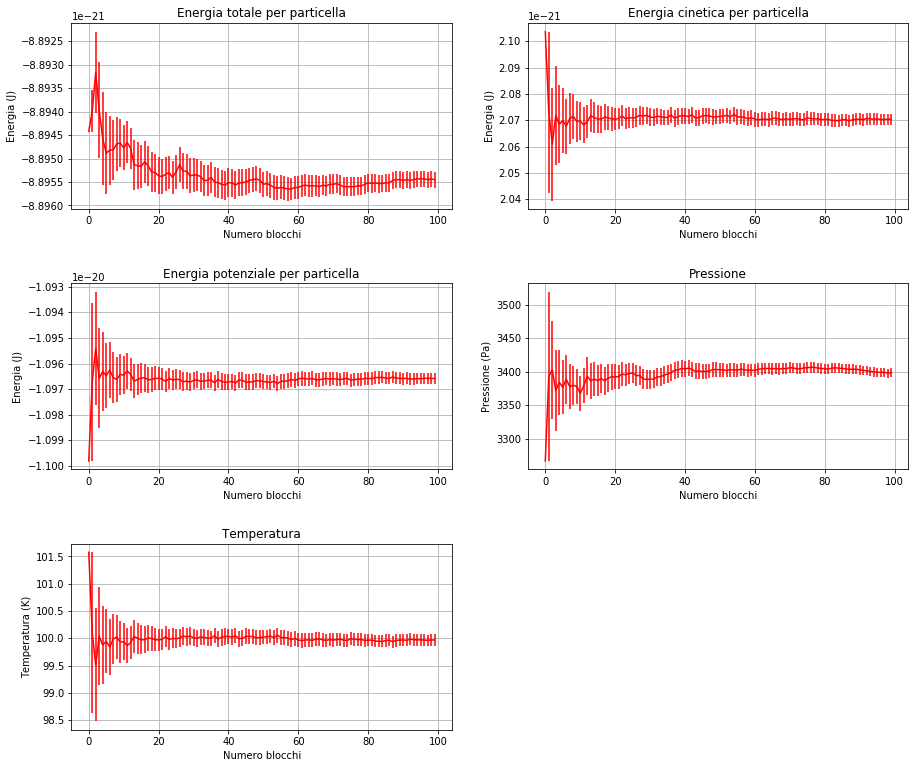

In [9]:
# Questo codice apre il file dei dati, li legge e li inserisce in un grafico apposito.
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(15, 13))                     #sx: larghezza; dx: Lunghezza
fig.subplots_adjust(hspace=0.4, wspace=0.2)

n_blocchi = 100

x, f, error = np.loadtxt("./Esercizio04.4_solido/ave_etot.out", usecols=(0,1,2), delimiter='   ', unpack='true')
# Passa i valori di energia in unità del SI moltiplicandoli per epsilon, anche i loro errori.
for i in range(0,100):
    f[i] = f[i] * epsilon
    error[i] = error[i] * epsilon

plt.subplot(3,2,1)
plt.errorbar(x,f,yerr=error,color='r')
plt.xlabel('Numero blocchi')
plt.ylabel('Energia (J)')
plt.grid()
plt.title("Energia totale per particella")

plt.subplot(3,2,2)
x, f, error = np.loadtxt("./Esercizio04.4_solido/ave_ekin.out", usecols=(0,1,2), delimiter='   ', unpack='true')
# Passa i valori di energia in unità del SI moltiplicandoli per epsilon, anche i loro errori.
for i in range(0,100):
    f[i] = f[i] * epsilon
    error[i] = error[i] * epsilon
plt.errorbar(x,f,yerr=error,color='r')
plt.xlabel('Numero blocchi')
plt.ylabel('Energia (J)')
plt.grid()
plt.title("Energia cinetica per particella")

plt.subplot(3,2,3)
x, f, error = np.loadtxt("./Esercizio04.4_solido/ave_epot.out", usecols=(0,1,2), delimiter='   ', unpack='true')
# Passa i valori di energia in unità del SI moltiplicandoli per epsilon, anche i loro errori.
for i in range(0,100):
    f[i] = f[i] * epsilon
    error[i] = error[i] * epsilon
plt.errorbar(x,f,yerr=error,color='r')
plt.xlabel('Numero blocchi')
plt.ylabel('Energia (J)')
plt.grid()
plt.title("Energia potenziale per particella")

plt.subplot(3,2,4)
x, f, error = np.loadtxt("./Esercizio04.4_solido/ave_press.out", usecols=(0,1,2), delimiter='   ', unpack='true')
# Passa i valori di pressione in unità del SI moltiplicandoli per epsilon/sigma3, anche i loro errori.
for i in range(0,100):
    f[i] = f[i] * epsilon / sigma**3 / 101300
    error[i] = error[i] * epsilon / sigma**3 / 101300
plt.errorbar(x,f,yerr=error,color='r')
plt.xlabel('Numero blocchi')
plt.ylabel('Pressione (Pa)')
plt.grid()
plt.title("Pressione")

plt.subplot(3,2,5)
x, f, error = np.loadtxt("./Esercizio04.4_solido/ave_t.out", usecols=(0,1,2), delimiter='   ', unpack='true')
# Passa i valori di temperatura in unità del SI moltiplicandoli per epsilon/kB, anche i loro errori.
for i in range(0,100):
    f[i] = f[i] * epsilon / boltzmann
    error[i] = error[i] * epsilon / boltzmann
plt.errorbar(x,f,yerr=error,color='r')
plt.xlabel('Numero blocchi')
plt.ylabel('Temperatura (K)')
plt.grid()
plt.title("Temperatura")

plt.show()

## Argon: stato liquido ##
I parametri utilizzati per lo stato liquido sono i seguenti:
<ul>
    <li>$T=1.1$</li>
    <li>$\rho = 0.8$</li>
    <li>$r_{cut}=2.5$</li>
</ul>

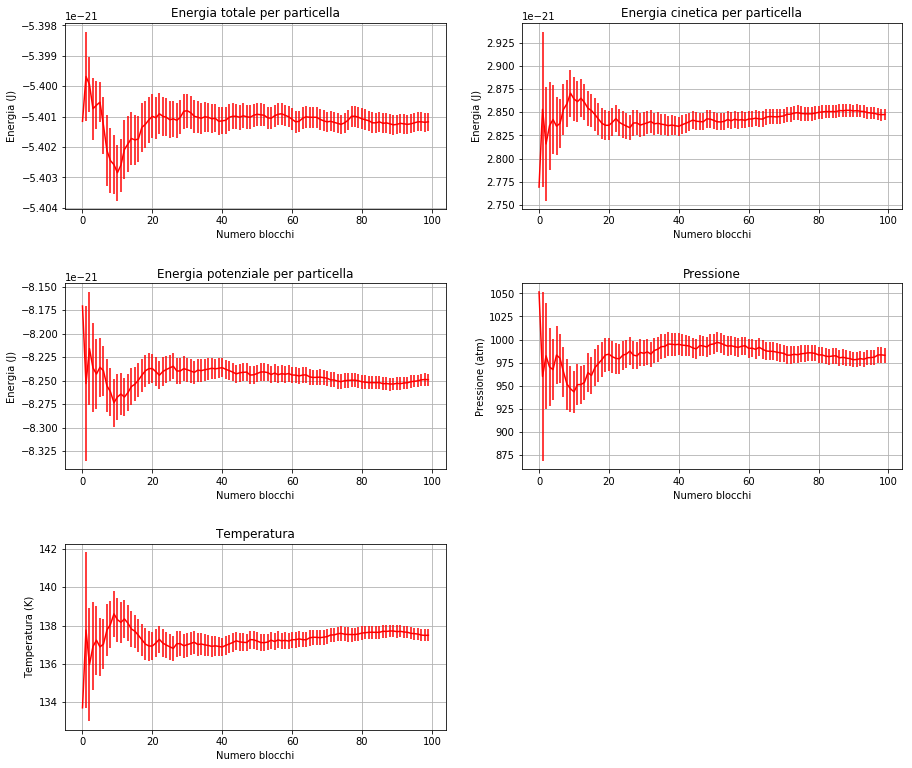

In [15]:
# Questo codice apre il file dei dati, li legge e li inserisce in un grafico apposito.
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(15, 13))                     #sx: larghezza; dx: Lunghezza
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.subplot(3,2,1)
x, f, error = np.loadtxt("./Esercizio04.4_liquido/ave_etot.out", usecols=(0,1,2), delimiter='   ', unpack='true')
for i in range(0,100):
    f[i] = f[i] * epsilon
    error[i] = error[i] * epsilon
plt.errorbar(x,f,yerr=error,color='r')
plt.xlabel('Numero blocchi')
plt.ylabel('Energia (J)')
plt.grid()
plt.title("Energia totale per particella")

plt.subplot(3,2,2)
x, f, error = np.loadtxt("./Esercizio04.4_liquido/ave_ekin.out", usecols=(0,1,2), delimiter='   ', unpack='true')
for i in range(0,100):
    f[i] = f[i] * epsilon
    error[i] = error[i] * epsilon
plt.errorbar(x,f,yerr=error,color='r')
plt.xlabel('Numero blocchi')
plt.ylabel('Energia (J)')
plt.grid()
plt.title("Energia cinetica per particella")

plt.subplot(3,2,3)
x, f, error = np.loadtxt("./Esercizio04.4_liquido/ave_epot.out", usecols=(0,1,2), delimiter='   ', unpack='true')
for i in range(0,100):
    f[i] = f[i] * epsilon
    error[i] = error[i] * epsilon
plt.errorbar(x,f,yerr=error,color='r')
plt.xlabel('Numero blocchi')
plt.ylabel('Energia (J)')
plt.grid()
plt.title("Energia potenziale per particella")

plt.subplot(3,2,4)
x, f, error = np.loadtxt("./Esercizio04.4_liquido/ave_press.out", usecols=(0,1,2), delimiter='   ', unpack='true')
for i in range(0,100):
    f[i] = f[i] * epsilon / sigma**3 / 101300
    error[i] = error[i] * epsilon / sigma**3 / 101300
plt.errorbar(x,f,yerr=error,color='r')
plt.xlabel('Numero blocchi')
plt.ylabel('Pressione (atm)')
plt.grid()
plt.title("Pressione")

plt.subplot(3,2,5)
x, f, error = np.loadtxt("./Esercizio04.4_liquido/ave_t.out", usecols=(0,1,2), delimiter='   ', unpack='true')
for i in range(0,100):
    f[i] = f[i] * epsilon / boltzmann
    error[i] = error[i] * epsilon / boltzmann
plt.errorbar(x,f,yerr=error,color='r')
plt.xlabel('Numero blocchi')
plt.ylabel('Temperatura (K)')
plt.grid()
plt.title("Temperatura")

plt.show()

## Argon: stato gassoso ##
I parametri utilizzati per lo stato gassoso sono i seguenti:
<ul>
    <li>$T=1.2$</li>
    <li>$\rho = 0.05$</li>
    <li>$r_{cut}=5.0$</li>
</ul>

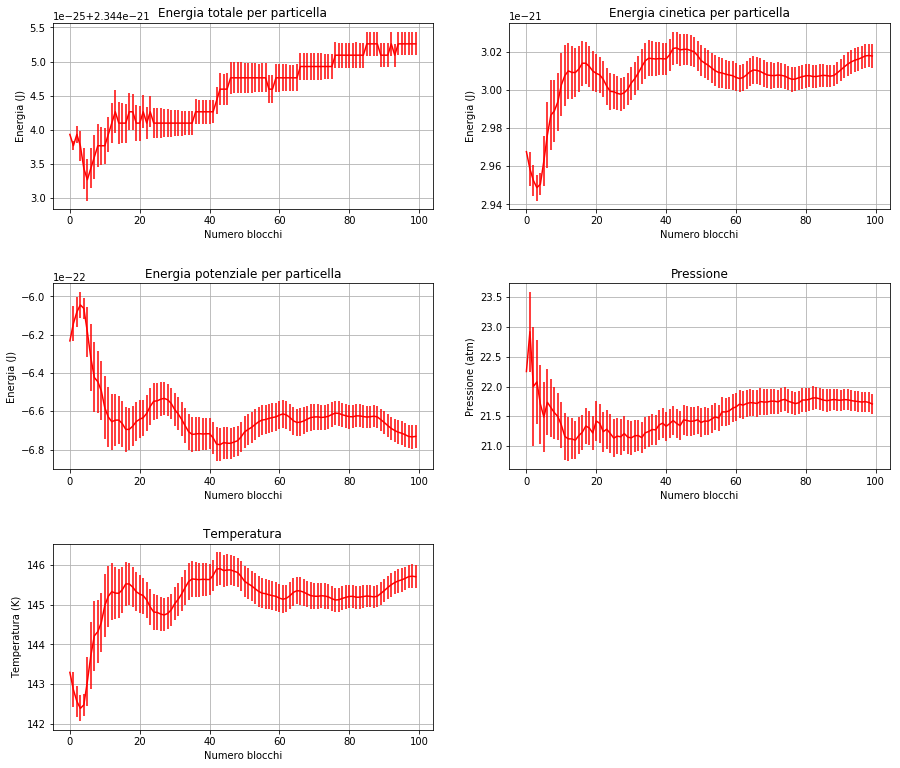

In [21]:
# Questo codice apre il file dei dati, li legge e li inserisce in un grafico apposito.
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(15, 13))                     #sx: larghezza; dx: Lunghezza
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.subplot(3,2,1)
x, f, error = np.loadtxt("./Esercizio04.4_gas/ave_etot.out", usecols=(0,1,2), delimiter='   ', unpack='true')
for i in range(0,100):
    f[i] = f[i] * epsilon
    error[i] = error[i] * epsilon
plt.errorbar(x,f,yerr=error,color='r')
plt.xlabel('Numero blocchi')
plt.ylabel('Energia (J)')
plt.grid()
plt.title("Energia totale per particella")

plt.subplot(3,2,2)
x, f, error = np.loadtxt("./Esercizio04.4_gas/ave_ekin.out", usecols=(0,1,2), delimiter='   ', unpack='true')
for i in range(0,100):
    f[i] = f[i] * epsilon
    error[i] = error[i] * epsilon
plt.errorbar(x,f,yerr=error,color='r')
plt.xlabel('Numero blocchi')
plt.ylabel('Energia (J)')
plt.grid()
plt.title("Energia cinetica per particella")

plt.subplot(3,2,3)
x, f, error = np.loadtxt("./Esercizio04.4_gas/ave_epot.out", usecols=(0,1,2), delimiter='   ', unpack='true')
for i in range(0,100):
    f[i] = f[i] * epsilon
    error[i] = error[i] * epsilon
plt.errorbar(x,f,yerr=error,color='r')
plt.xlabel('Numero blocchi')
plt.ylabel('Energia (J)')
plt.grid()
plt.title("Energia potenziale per particella")


plt.subplot(3,2,4)
x, f, error = np.loadtxt("./Esercizio04.4_gas/ave_press.out", usecols=(0,1,2), delimiter='   ', unpack='true')
for i in range(0,100):
    f[i] = f[i] * epsilon / sigma**3 / 101300
    error[i] = error[i] * epsilon / sigma**3 / 101300
plt.errorbar(x,f,yerr=error,color='r')
plt.xlabel('Numero blocchi')
plt.ylabel('Pressione (atm)')
plt.grid()
plt.title("Pressione")

plt.subplot(3,2,5)
x, f, error = np.loadtxt("./Esercizio04.4_gas/ave_t.out", usecols=(0,1,2), delimiter='   ', unpack='true')
for i in range(0,100):
    f[i] = f[i] * epsilon / boltzmann
    error[i] = error[i] * epsilon / boltzmann
plt.errorbar(x,f,yerr=error,color='r')
plt.xlabel('Numero blocchi')
plt.ylabel('Temperatura (K)')
plt.grid()
plt.title("Temperatura")

plt.show()

Dai grafici appare evidente che la qualità dei dati ottenuti per lo stato gassoso è decisamente peggiore di quella dei dati ottenuti per gli stati solido e liquido. In particolare, si nota come le barre di errore funzionino piuttosto male come stimatori della reale incertezza. In effetti, le fluttuazioni tendono a non essere comprese nelle barre di errore. Ritengo che questo comportamento sia dovuto al fatto che l'equilibrazione del gas si verifica essere di grande difficoltà, e che quindi probabilmente nel sistema sono ancora presenti variazioni delle quantità macroscopiche. Di fatto, sto misurando un sistema non completamente equilibrato, quindi non posso dire che la media temporale delle quantità misurate sia un buon indicatore delle stesse.

# Krypton #
Per il krypton i valori delle costanti sono $\epsilon = 164K \cdot k_B$, $\sigma = 0.364 nm$. Riporto di seguito i grafici ottenuti. I valori delle variabili in unità di Lennard-Jones sono gli stessi del caso dell'argon.

In [23]:
boltzmann = 1.38065e-23
epsilon = 164 * boltzmann
sigma = 0.364e-9

## Krypton: stato solido ##

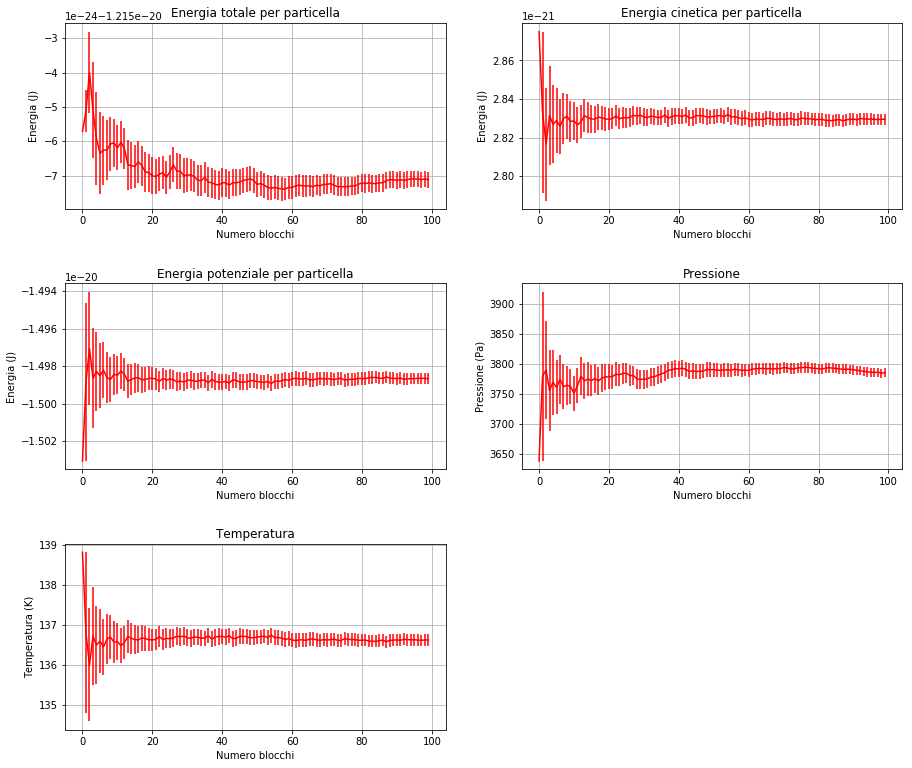

In [24]:
# Questo codice apre il file dei dati, li legge e li inserisce in un grafico apposito.
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(15, 13))                     #sx: larghezza; dx: Lunghezza
fig.subplots_adjust(hspace=0.4, wspace=0.2)

n_blocchi = 100

x, f, error = np.loadtxt("./Esercizio04.4_solido/ave_etot.out", usecols=(0,1,2), delimiter='   ', unpack='true')
# Passa i valori di energia in unità del SI moltiplicandoli per epsilon, anche i loro errori.
for i in range(0,100):
    f[i] = f[i] * epsilon
    error[i] = error[i] * epsilon

plt.subplot(3,2,1)
plt.errorbar(x,f,yerr=error,color='r')
plt.xlabel('Numero blocchi')
plt.ylabel('Energia (J)')
plt.grid()
plt.title("Energia totale per particella")

plt.subplot(3,2,2)
x, f, error = np.loadtxt("./Esercizio04.4_solido/ave_ekin.out", usecols=(0,1,2), delimiter='   ', unpack='true')
# Passa i valori di energia in unità del SI moltiplicandoli per epsilon, anche i loro errori.
for i in range(0,100):
    f[i] = f[i] * epsilon
    error[i] = error[i] * epsilon
plt.errorbar(x,f,yerr=error,color='r')
plt.xlabel('Numero blocchi')
plt.ylabel('Energia (J)')
plt.grid()
plt.title("Energia cinetica per particella")

plt.subplot(3,2,3)
x, f, error = np.loadtxt("./Esercizio04.4_solido/ave_epot.out", usecols=(0,1,2), delimiter='   ', unpack='true')
# Passa i valori di energia in unità del SI moltiplicandoli per epsilon, anche i loro errori.
for i in range(0,100):
    f[i] = f[i] * epsilon
    error[i] = error[i] * epsilon
plt.errorbar(x,f,yerr=error,color='r')
plt.xlabel('Numero blocchi')
plt.ylabel('Energia (J)')
plt.grid()
plt.title("Energia potenziale per particella")

plt.subplot(3,2,4)
x, f, error = np.loadtxt("./Esercizio04.4_solido/ave_press.out", usecols=(0,1,2), delimiter='   ', unpack='true')
# Passa i valori di pressione in unità del SI moltiplicandoli per epsilon/sigma3, anche i loro errori.
for i in range(0,100):
    f[i] = f[i] * epsilon / sigma**3 / 101300
    error[i] = error[i] * epsilon / sigma**3 / 101300
plt.errorbar(x,f,yerr=error,color='r')
plt.xlabel('Numero blocchi')
plt.ylabel('Pressione (Pa)')
plt.grid()
plt.title("Pressione")

plt.subplot(3,2,5)
x, f, error = np.loadtxt("./Esercizio04.4_solido/ave_t.out", usecols=(0,1,2), delimiter='   ', unpack='true')
# Passa i valori di temperatura in unità del SI moltiplicandoli per epsilon/kB, anche i loro errori.
for i in range(0,100):
    f[i] = f[i] * epsilon / boltzmann
    error[i] = error[i] * epsilon / boltzmann
plt.errorbar(x,f,yerr=error,color='r')
plt.xlabel('Numero blocchi')
plt.ylabel('Temperatura (K)')
plt.grid()
plt.title("Temperatura")

plt.show()

## Krypton: stato liquido ##

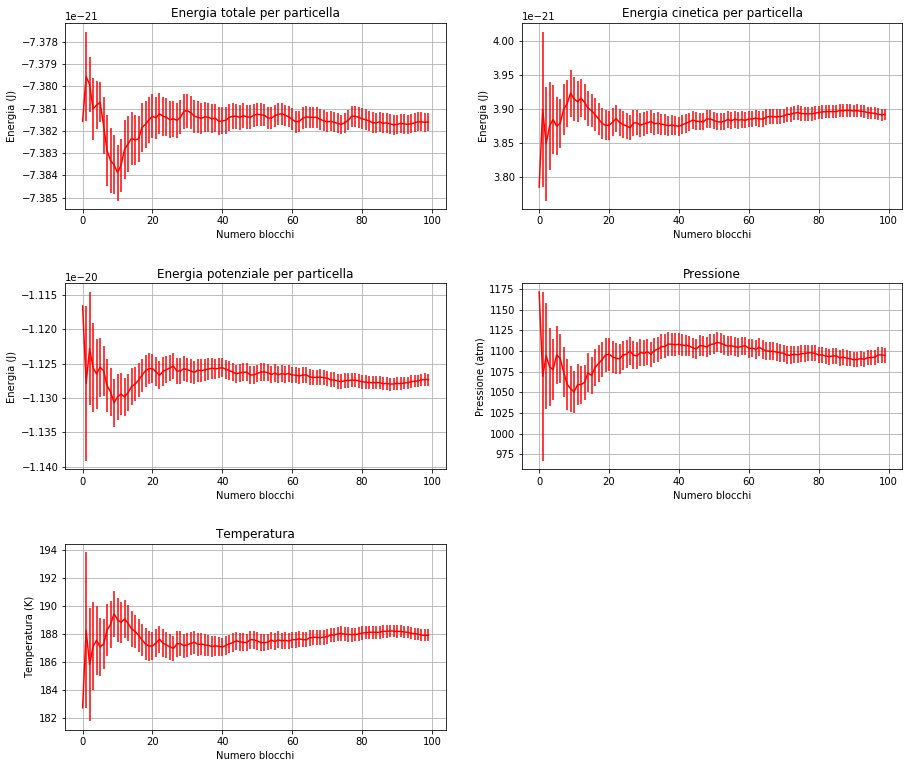

In [25]:
# Questo codice apre il file dei dati, li legge e li inserisce in un grafico apposito.
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(15, 13))                     #sx: larghezza; dx: Lunghezza
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.subplot(3,2,1)
x, f, error = np.loadtxt("./Esercizio04.4_liquido/ave_etot.out", usecols=(0,1,2), delimiter='   ', unpack='true')
for i in range(0,100):
    f[i] = f[i] * epsilon
    error[i] = error[i] * epsilon
plt.errorbar(x,f,yerr=error,color='r')
plt.xlabel('Numero blocchi')
plt.ylabel('Energia (J)')
plt.grid()
plt.title("Energia totale per particella")

plt.subplot(3,2,2)
x, f, error = np.loadtxt("./Esercizio04.4_liquido/ave_ekin.out", usecols=(0,1,2), delimiter='   ', unpack='true')
for i in range(0,100):
    f[i] = f[i] * epsilon
    error[i] = error[i] * epsilon
plt.errorbar(x,f,yerr=error,color='r')
plt.xlabel('Numero blocchi')
plt.ylabel('Energia (J)')
plt.grid()
plt.title("Energia cinetica per particella")

plt.subplot(3,2,3)
x, f, error = np.loadtxt("./Esercizio04.4_liquido/ave_epot.out", usecols=(0,1,2), delimiter='   ', unpack='true')
for i in range(0,100):
    f[i] = f[i] * epsilon
    error[i] = error[i] * epsilon
plt.errorbar(x,f,yerr=error,color='r')
plt.xlabel('Numero blocchi')
plt.ylabel('Energia (J)')
plt.grid()
plt.title("Energia potenziale per particella")

plt.subplot(3,2,4)
x, f, error = np.loadtxt("./Esercizio04.4_liquido/ave_press.out", usecols=(0,1,2), delimiter='   ', unpack='true')
for i in range(0,100):
    f[i] = f[i] * epsilon / sigma**3 / 101300
    error[i] = error[i] * epsilon / sigma**3 / 101300
plt.errorbar(x,f,yerr=error,color='r')
plt.xlabel('Numero blocchi')
plt.ylabel('Pressione (atm)')
plt.grid()
plt.title("Pressione")

plt.subplot(3,2,5)
x, f, error = np.loadtxt("./Esercizio04.4_liquido/ave_t.out", usecols=(0,1,2), delimiter='   ', unpack='true')
for i in range(0,100):
    f[i] = f[i] * epsilon / boltzmann
    error[i] = error[i] * epsilon / boltzmann
plt.errorbar(x,f,yerr=error,color='r')
plt.xlabel('Numero blocchi')
plt.ylabel('Temperatura (K)')
plt.grid()
plt.title("Temperatura")

plt.show()

## Krypton: stato gassoso ##

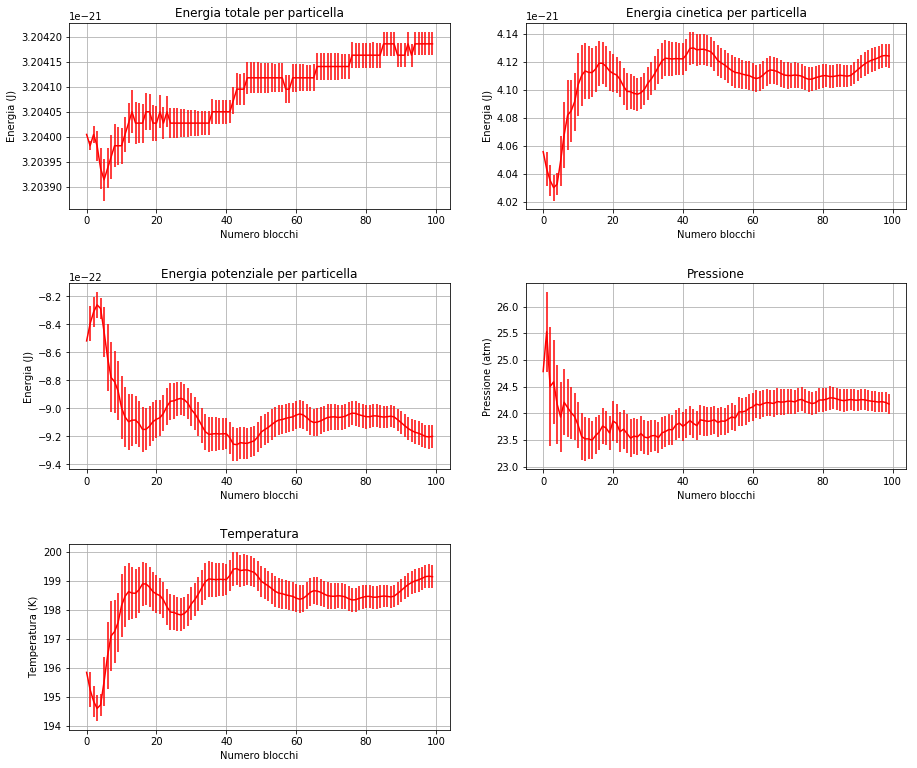

In [27]:
# Questo codice apre il file dei dati, li legge e li inserisce in un grafico apposito.
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(15, 13))                     #sx: larghezza; dx: Lunghezza
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.subplot(3,2,1)
x, f, error = np.loadtxt("./Esercizio04.4_gas/ave_etot.out", usecols=(0,1,2), delimiter='   ', unpack='true')
for i in range(0,100):
    f[i] = f[i] * epsilon
    error[i] = error[i] * epsilon
plt.errorbar(x,f,yerr=error,color='r')
plt.xlabel('Numero blocchi')
plt.ylabel('Energia (J)')
plt.grid()
plt.title("Energia totale per particella")

plt.subplot(3,2,2)
x, f, error = np.loadtxt("./Esercizio04.4_gas/ave_ekin.out", usecols=(0,1,2), delimiter='   ', unpack='true')
for i in range(0,100):
    f[i] = f[i] * epsilon
    error[i] = error[i] * epsilon
plt.errorbar(x,f,yerr=error,color='r')
plt.xlabel('Numero blocchi')
plt.ylabel('Energia (J)')
plt.grid()
plt.title("Energia cinetica per particella")

plt.subplot(3,2,3)
x, f, error = np.loadtxt("./Esercizio04.4_gas/ave_epot.out", usecols=(0,1,2), delimiter='   ', unpack='true')
for i in range(0,100):
    f[i] = f[i] * epsilon
    error[i] = error[i] * epsilon
plt.errorbar(x,f,yerr=error,color='r')
plt.xlabel('Numero blocchi')
plt.ylabel('Energia (J)')
plt.grid()
plt.title("Energia potenziale per particella")


plt.subplot(3,2,4)
x, f, error = np.loadtxt("./Esercizio04.4_gas/ave_press.out", usecols=(0,1,2), delimiter='   ', unpack='true')
for i in range(0,100):
    f[i] = f[i] * epsilon / sigma**3 / 101300
    error[i] = error[i] * epsilon / sigma**3 / 101300
plt.errorbar(x,f,yerr=error,color='r')
plt.xlabel('Numero blocchi')
plt.ylabel('Pressione (atm)')
plt.grid()
plt.title("Pressione")

plt.subplot(3,2,5)
x, f, error = np.loadtxt("./Esercizio04.4_gas/ave_t.out", usecols=(0,1,2), delimiter='   ', unpack='true')
for i in range(0,100):
    f[i] = f[i] * epsilon / boltzmann
    error[i] = error[i] * epsilon / boltzmann
plt.errorbar(x,f,yerr=error,color='r')
plt.xlabel('Numero blocchi')
plt.ylabel('Temperatura (K)')
plt.grid()
plt.title("Temperatura")

plt.show()